<a href="https://colab.research.google.com/github/andrecauss/causs_data_science/blob/master/Analisando_os_Dados_do_Airbnb_(Roma_It%C3%A1lia).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **André Causs**


# Análise dos Dados do Airbnb - *Roma, Itália*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Roma, capital da Itália, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
Todos os dados usados aqui foram obtidos a partir do site Inside Airbnb.

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*

In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/italy/lazio/rome/2020-04-29/visualisations/listings.csv")

## Análise dos Dados
Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2737,"Single room in cozy, clean flat.",3047,Elif,NaN,VIII Appia Antica,41.87218,12.48355,Private room,18,60,7,2015-05-28,0.11,5,365
1,2903,Stay a night in Calisto6 B&B Rome,3280,Andrea,NaN,I Centro Storico,41.88826,12.47002,Private room,100,1,55,2017-10-31,0.39,3,365
2,3079,Cozy apartment (2-4)with Colisseum view,3504,Laura,NaN,I Centro Storico,41.89503,12.49163,Entire home/apt,105,2,17,2018-10-01,0.15,6,365
3,11834,"Roma ""Charming Boschetto House""",44552,Serena,NaN,I Centro Storico,41.89574,12.49058,Entire home/apt,85,2,142,2020-01-03,1.29,1,345
4,12398,Casa Donatello - Home far from Home,11756,Gea,NaN,II Parioli/Nomentano,41.92584,12.46809,Entire home/apt,95,3,39,2015-07-19,0.34,1,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.
Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o `listings.csv`. Há uma versão detalhada/completa no mesmo diretório.

In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 31215
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade de um *dataset* está relacionada diretamente à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group* possui 100% de seus valores ausentes.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase 20% das linhas.
* As variáveis `name` e `host_name` possuem menos que 1% de valores nulos.
* As demais variáveis estão com todos valores preenchidos, o que agrega muita qualidade ao dataset.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.197437
last_review                       0.197437
name                              0.000320
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para identificar a distribuição das variáveis, irei plotar um histograma para cada uma delas.

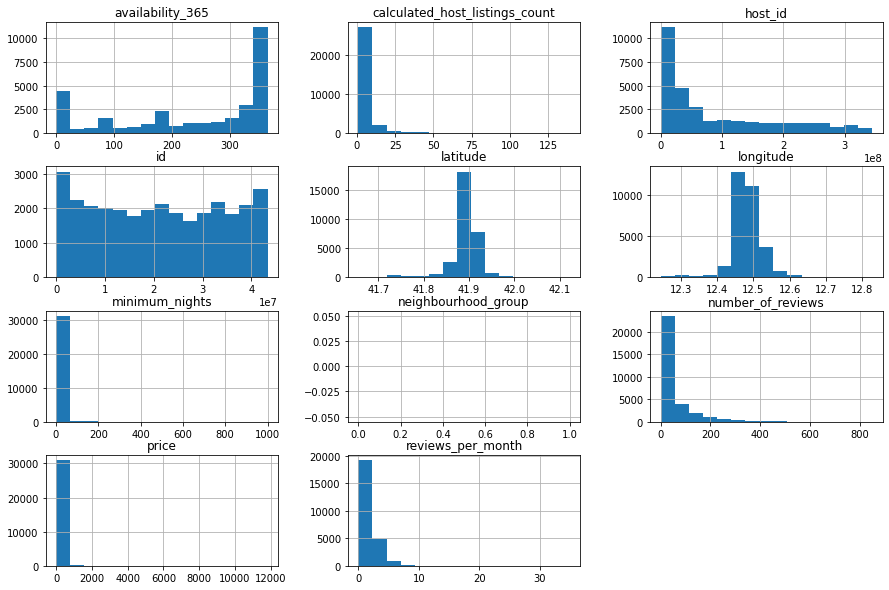

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**
Pela distribuição do histograma, é possível verificar indícios de *outliers*. Olhe por exemplo a varíavel `price`, `minimum_nights` e `calculated_host_listings_count`.
Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar há duas maneiras rápidas que auxiliam na detecção de *outliers*. São elas:


*   Resumo estatístico por meio do método `describe()`.
*   Plotar `boxplots`para a variável.



In [8]:
#resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365' ]].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,31215.000000,31215.000000,31215.000000,25052.000000,31215.000000,31215.000000
mean,111.487041,3.080154,43.126862,1.460446,7.181643,235.998270
std,276.420392,15.307859,70.042274,1.518958,16.905015,132.775951
min,3.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,50.000000,1.000000,1.000000,0.280000,1.000000,124.000000
50%,75.000000,2.000000,12.000000,0.930000,2.000000,293.000000
75%,115.000000,3.000000,55.000000,2.220000,6.000000,357.000000
max,11818.000000,1000.000000,850.000000,34.960000,139.000000,365.000000


Olhando o resumo estatístico acima podemos, podemos confirmar algumas hipóteses, como:


*   A varíavel `price` possui 75% do valor abaixo de 115, porém seu valor máximo é 11818.
*   A quantidade mínima de noites (`minimum_nights`) está acima de 365 por ano.



### Boxplot para `minimum_nights`

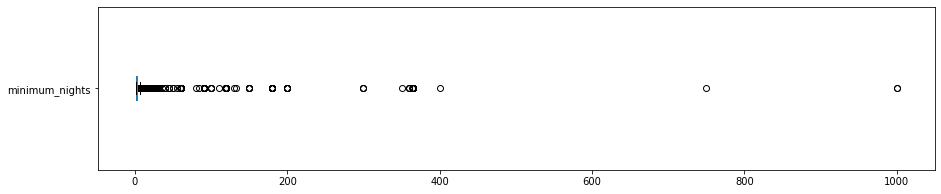

minimum_nights: valores acima de 30:
163 entradas
0.5222%


In [9]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#ver quantidade de valores acima de 30 dias para mínimo de noites
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0]) * 100))



### Boxplot para `price`

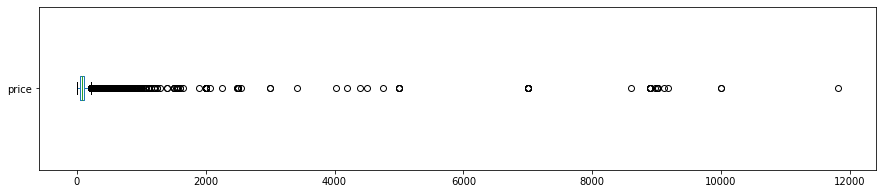

price: valores acima de 1500:
66 entradas
0.2114%


In [10]:
# price
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#ver quantidade de valores acima de 30 dias para mínimo de noites
print("price: valores acima de 1500:")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0]) * 100))



### Histogramas sem *outliers*
Já que identificamos os *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.





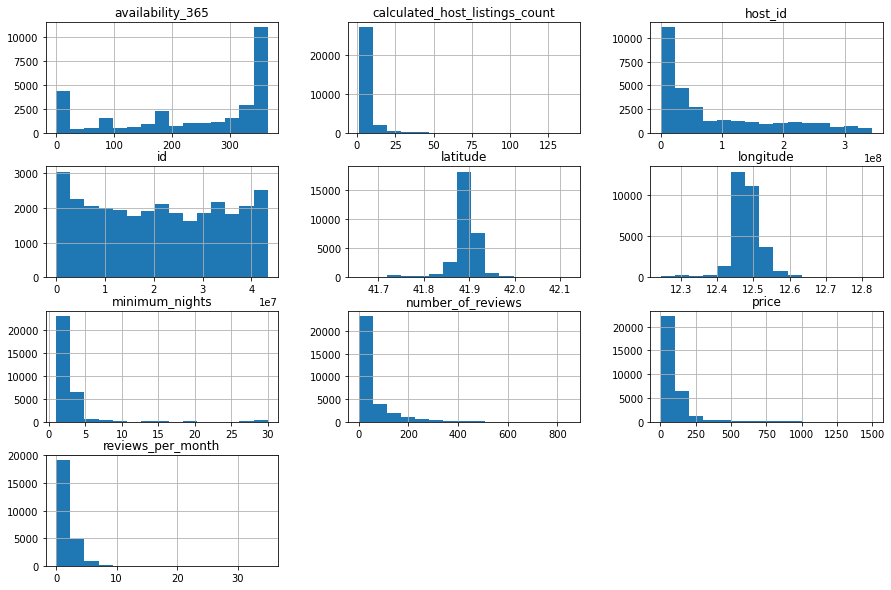

In [14]:
#remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));


### **Q5. Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhnaça entre duas variáveis.
Essas realação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variábeis de interesse, vou:

*   Gerar uma matriz de correlação.
*   Gerar um *heatmap* a partir desta matriz, usando a biblioteca `seaborn`.

In [20]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.027417,-0.080538,-0.060598,0.110178,0.101484
minimum_nights,-0.027417,1.000000,-0.033981,-0.075493,-0.004181,-0.024796
number_of_reviews,-0.080538,-0.033981,1.000000,0.770025,-0.063971,0.101430
reviews_per_month,-0.060598,-0.075493,0.770025,1.000000,-0.052434,0.066579
calculated_host_listings_count,0.110178,-0.004181,-0.063971,-0.052434,1.000000,0.013727
availability_365,0.101484,-0.024796,0.101430,0.066579,0.013727,1.000000


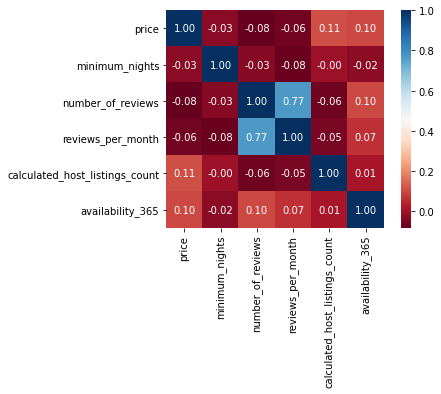

In [22]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado em Roma?**
Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [23]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    19991
Private room        9255
Hotel room          1491
Shared room          249
Name: room_type, dtype: int64

In [28]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.645162
Private room       0.298683
Hotel room         0.048119
Shared room        0.008036
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara de Roma?**
Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso queremos comparar os bairros (*neighbourhoods) a partir do preço de locação.



In [89]:
# ver preços na média
df_clean.price.mean()

101.84399406183438

In [31]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
I Centro Storico        126.059585
IX Eur                   94.946092
XV Cassia/Flaminia       88.588441
XIII Aurelia             88.034534
II Parioli/Nomentano     84.542512
XII Monte Verde          77.708385
XIV Monte Mario          73.843137
XI Arvalia/Portuense     70.189046
X Ostia/Acilia           69.922844
VIII Appia Antica        69.472540
Name: price, dtype: float64

Acima, vemos que os bairros como I Centro Storico, IX, Eur e XV Cassia/Flamina, estão com média de preço superior aos demais lugares.
Uma pessoa que não conhecesse Roma poderia apresentar esses resultados sem se questionar. Isto está correto? Precisamos entender se o bairro **I Centro Storico** possui uma grande representatividade dentro do nosso dataset. 

Abaixo podemos verificar que o bairro ***I Centro Storico*** possui quase 53% das ocupações.

In [88]:
# ver quantidade de imóveis em I Centro Storico
print(df_clean.neighbourhood.value_counts(normalize=True).filter(like='I Centro Storico', axis=0))


I Centro Storico    0.528626
Name: neighbourhood, dtype: float64


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

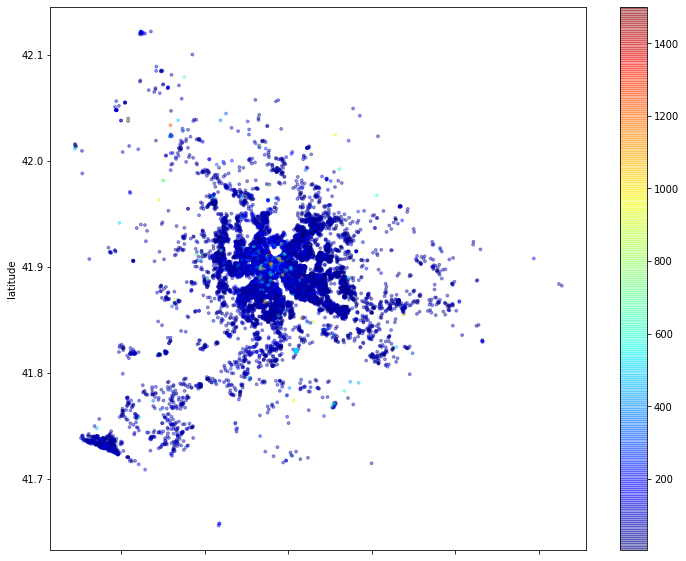

In [60]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,10));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [18]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.values.mean()

2.315368230813916

## **Conclusão**

Ainda que de forma superficial, com as análises que fiz nos dados do Airbnb acima, conseguimos identificar e limpar *outliers* que estavam poluindo a informações. 

Também nota-se que grande parte das acomodações listadas - aproximadamente 53% delas - estão concetradas no centro histórico de Roma, também conhecido como **I Centro Storico**.

Analisando a média de preços por bairros, também é possível entender que o preço das acomodações está intimamente ligado à sua localização e proximidade às atrações turísticas. O bairro I Centro Storico, possui um valor médio 24% mais caro que o preço média das acomodações em Roma.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.

